Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [158]:
import numpy as np
import pandas as pd
import sklearn.datasets as dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
data_set = dataset.load_boston()
type(data_set)
boston_data = pd.DataFrame(data_set.data,columns=data_set.feature_names)
boston_data['Price']= data_set.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [160]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [161]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [162]:
boston_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

<AxesSubplot:xlabel='CHAS', ylabel='count'>

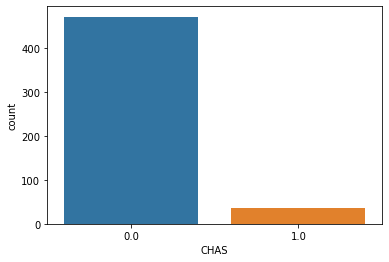

In [163]:
sns.countplot(x = "CHAS",data=boston_data)

<AxesSubplot:xlabel='RAD', ylabel='count'>

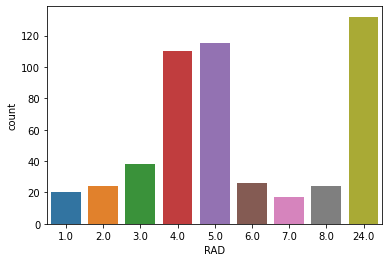

In [164]:
sns.countplot(x = "RAD",data=boston_data)

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

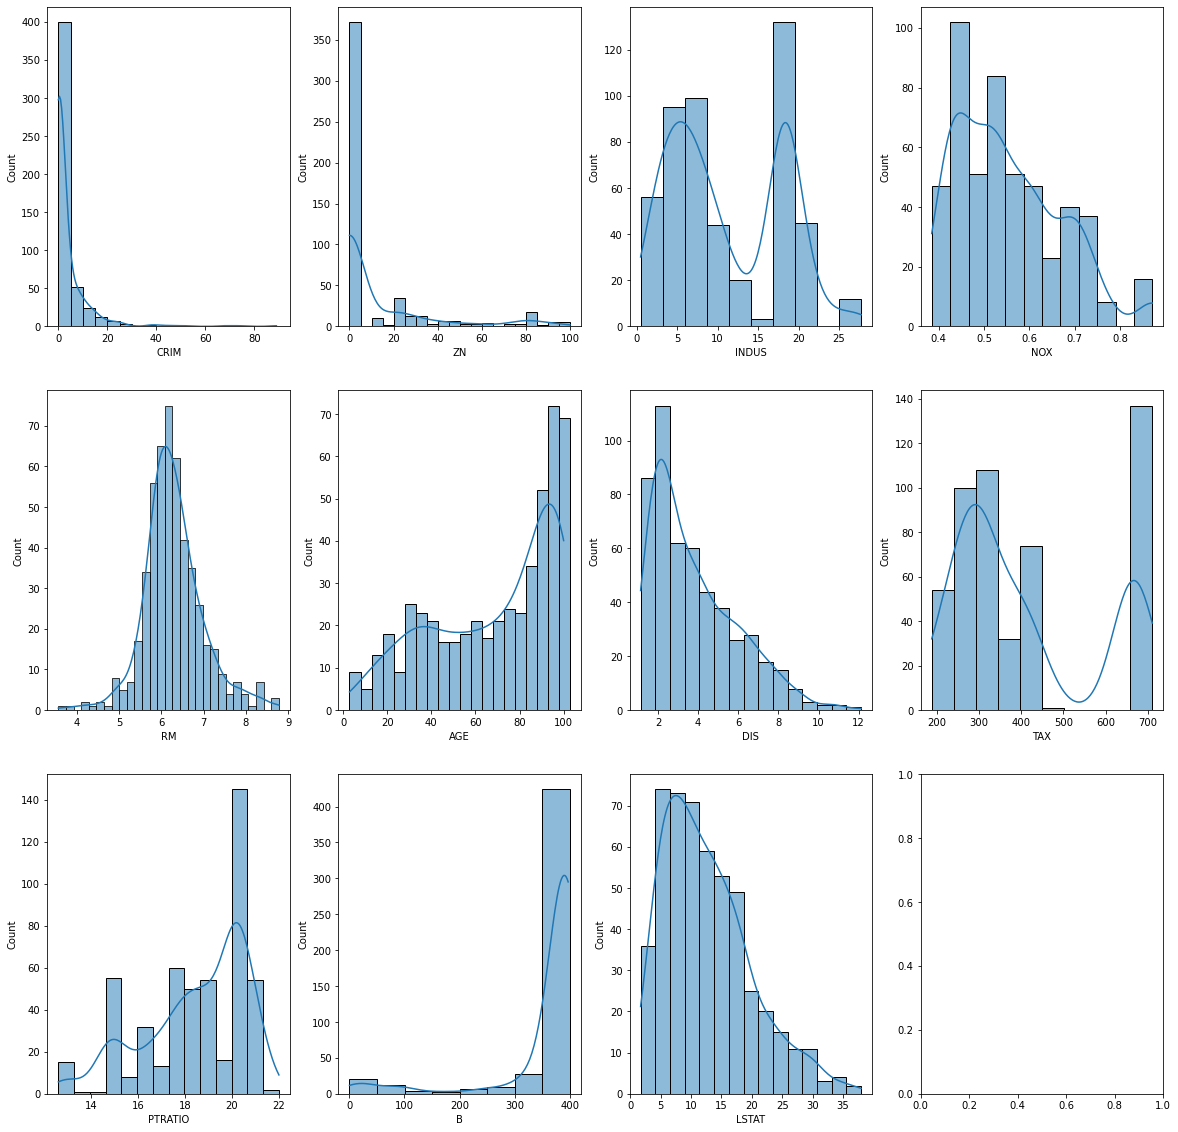

In [165]:
fig,ax = plt.subplots(3,4,figsize= (20,20))
sns.histplot(x = boston_data["CRIM"],kde=True,ax= ax[0,0],binwidth=5)
sns.histplot(x = boston_data["ZN"],kde=True,ax= ax[0,1],binwidth=5)
sns.histplot(x = boston_data["INDUS"],kde=True,ax= ax[0,2])
sns.histplot(x = boston_data["NOX"],kde=True,ax= ax[0,3])
sns.histplot(x = boston_data["RM"],kde=True,ax= ax[1,0])
sns.histplot(x = boston_data["AGE"],kde=True,ax= ax[1,1],binwidth=5)
sns.histplot(x = boston_data["DIS"],kde=True,ax= ax[1,2])
sns.histplot(x = boston_data["TAX"],kde=True,ax= ax[1,3])
sns.histplot(x = boston_data["PTRATIO"],kde=True,ax= ax[2,0])
sns.histplot(x = boston_data["B"],kde=True,ax= ax[2,1],binwidth=50)
sns.histplot(x = boston_data["LSTAT"],kde=True,ax= ax[2,2])

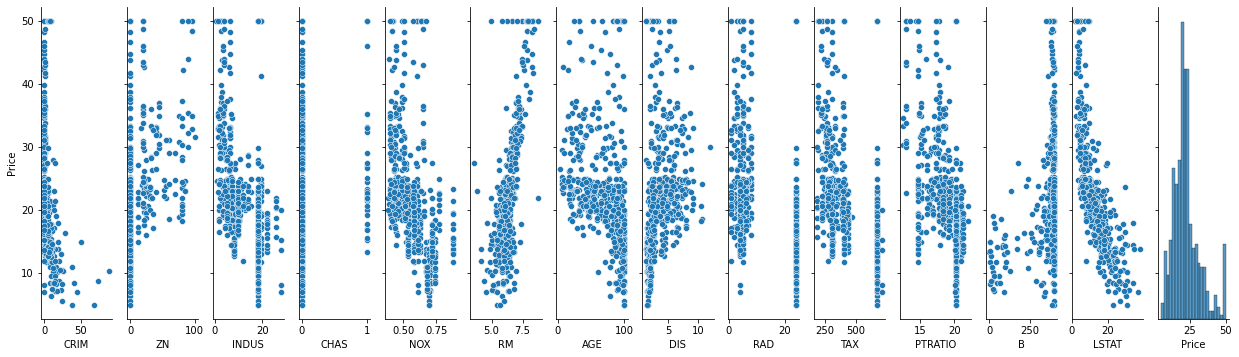

In [166]:
sns.pairplot(data=boston_data,y_vars=["Price"],height=5,aspect=0.25)

In [167]:
cols=['Price','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']
CorrelationData=boston_data[cols].corr()
CorrelationData["Price"][abs(CorrelationData["Price"])>0.5]

Price      1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

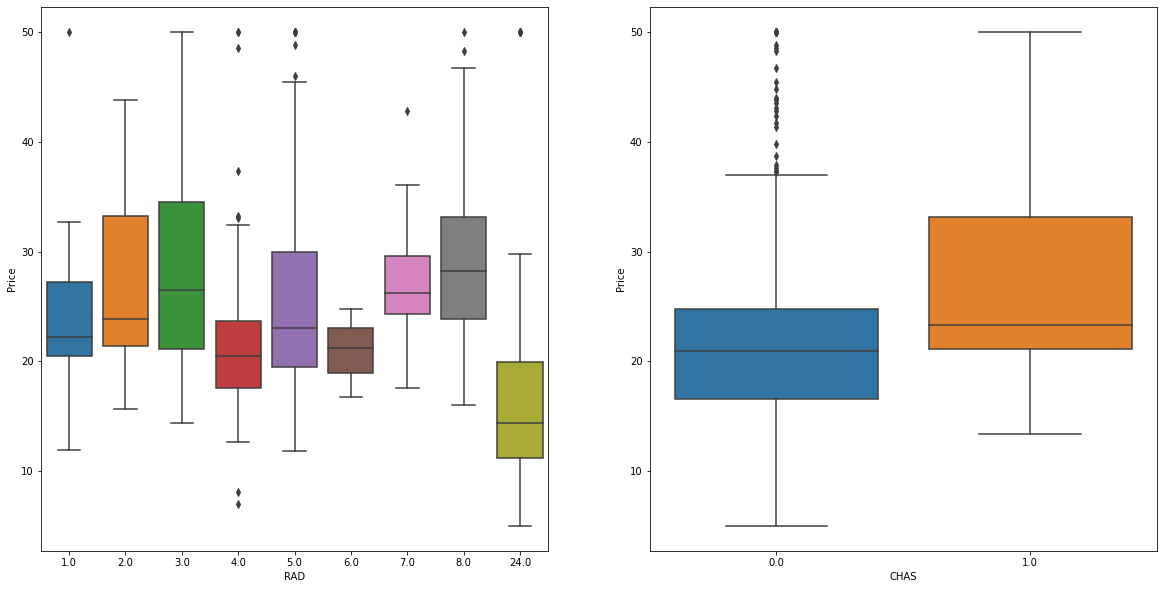

In [168]:
#Categorical data plotting
CategoricalColsList=['RAD', 'ZN']
fig,ax = plt.subplots(1,2,figsize= (20,10))
sns.boxplot(data=boston_data,x="RAD",y="Price",orient="v",ax=ax[0])
sns.boxplot(data=boston_data,x="CHAS",y="Price",orient="v",ax=ax[1])

<AxesSubplot:>

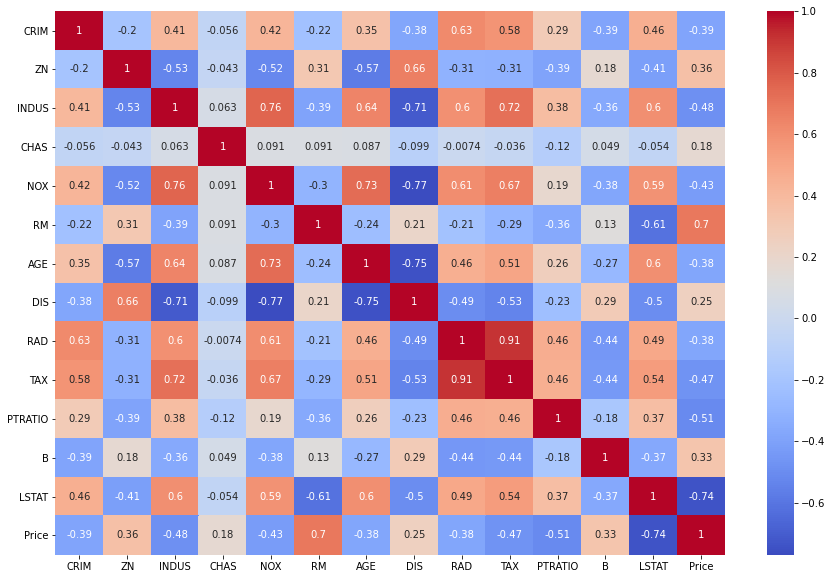

In [169]:
plt.figure(figsize=(15,10))
sns.heatmap(data=boston_data.corr(),annot=True,cmap="coolwarm")

In [170]:
selected_columns = ["RM","TAX","PTRATIO","LSTAT","ZN","Price"]
data_for_training = boston_data[selected_columns]
data_for_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   TAX      506 non-null    float64
 2   PTRATIO  506 non-null    float64
 3   LSTAT    506 non-null    float64
 4   ZN       506 non-null    float64
 5   Price    506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


In [171]:
target_variable = ["Price"]
predictors = ["RM","TAX","PTRATIO","LSTAT","ZN"]
Y= data_for_training[target_variable].values
X = data_for_training[predictors].values

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [173]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 5)
(354, 1)
(152, 5)
(152, 1)


In [174]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)
train_predictions = linear_reg.predict(X_train)
test_predictions =linear_reg.predict(X_test)
r2_value_train = metrics.r2_score(Y_train,train_predictions)
print(r2_value_train)

0.6861521038081234


In [175]:
test_data_result = pd.DataFrame(data=X_test,columns=predictors)
test_data_result[target_variable] = Y_test
test_data_result[('Predicted '+ target_variable[0])] = np.round(test_predictions)
test_data_result.head()

,RM,TAX,PTRATIO,LSTAT,ZN,Price,Predicted Price
0,8.247,307.0,17.4,3.95,0.0,48.3,38.0
1,6.380,666.0,20.2,23.69,0.0,13.1,16.0
2,5.983,711.0,20.1,18.07,0.0,13.6,16.0
3,5.762,666.0,20.2,10.42,0.0,21.8,18.0
4,7.267,254.0,17.6,6.05,40.0,33.2,32.0


In [176]:
test_data_result['Error'] = 100 *((abs(test_data_result['Price'] - test_data_result['Predicted Price']))/test_data_result['Price'])

In [177]:
test_data_result.head()

,RM,TAX,PTRATIO,LSTAT,ZN,Price,Predicted Price,Error
0,8.247,307.0,17.4,3.95,0.0,48.3,38.0,21.325052
1,6.380,666.0,20.2,23.69,0.0,13.1,16.0,22.137405
2,5.983,711.0,20.1,18.07,0.0,13.6,16.0,17.647059
3,5.762,666.0,20.2,10.42,0.0,21.8,18.0,17.431193
4,7.267,254.0,17.6,6.05,40.0,33.2,32.0,3.614458


In [190]:
mean_abs_perc_error = np.mean(test_data_result['Error'])
print("Accuracy on test data is ",100 - mean_abs_perc_error)

Accuracy on test data is  80.98152912060695


In [191]:
linear_reg.score(X_test,Y_test)

0.6546004302564072

In [192]:
#Checking if ols model is overfitting on train data
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
lasso_cv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasso_cv.fit(X_train,Y_train.ravel())

LassoCV(cv=10, max_iter=100000, normalize=True)

In [193]:
lasso_reg = Lasso(lasso_cv.alpha_)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.005353071996802179)

In [194]:
lasso_reg.score(X_train,Y_train)

0.6861511076945572

In [195]:
lasso_reg.score(X_test,Y_test)

0.6547974895430932

<AxesSubplot:>

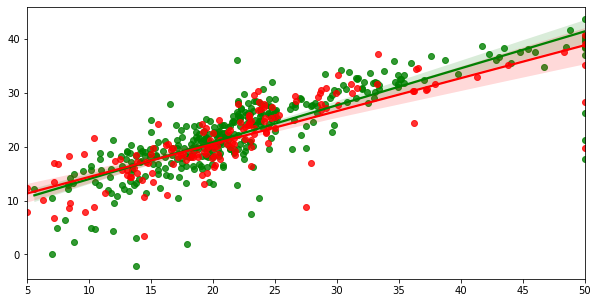

In [196]:
plt.figure(figsize=(10,5))
sns.regplot(x=Y_train,y=train_predictions, color = "green")
sns.regplot(x=Y_test,y=test_predictions, color = "red")

In [199]:
#storing model
import pickle
fileName = "boston_house_price_model.pickle"
pickle.dump(linear_reg,open(fileName,"wb"))

In [198]:
#checking model
loaded_model = pickle.load(open(fileName,'rb'))
input_model = [[4.903,403.0,14.7,29.29,0.0]]
result = loaded_model.predict(input_model)
result


array([[11.42610371]])